In [1]:
%matplotlib inline

import numpy as np
from pprint import pprint

from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad
import torchvision
from torchvision import models, datasets, transforms
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

torch.manual_seed(50)

print(torch.__version__, torchvision.__version__)

2.5.1 0.20.1


In [2]:
dst = datasets.CIFAR100("~/.torch", download=True)
tp = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor()
])
tt = transforms.ToPILImage()

device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
print(f"Running on {device}")

Files already downloaded and verified
Running on cpu


In [3]:

def label_to_onehot(target, num_classes=100):
    target = torch.unsqueeze(target, 1)
    onehot_target = torch.zeros(target.size(0), num_classes, device=target.device)
    onehot_target.scatter_(1, target, 1)
    return onehot_target

def cross_entropy_for_onehot(pred, target):
    return torch.mean(torch.sum(- target * F.log_softmax(pred, dim=-1), 1))

def weights_init(m):
    if hasattr(m, "weight"):
        m.weight.data.uniform_(-0.5, 0.5)
    if hasattr(m, "bias"):
        m.bias.data.uniform_(-0.5, 0.5)
    
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        act = nn.Sigmoid
        self.body = nn.Sequential(
            nn.Conv2d(3, 12, kernel_size=5, padding=5//2, stride=2),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=2),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
            act(),
        )
        self.fc = nn.Sequential(
            nn.Linear(768, 100)
        )
        
    def forward(self, x):
        out = self.body(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    
net = LeNet().to(device)
net.apply(weights_init)
criterion = cross_entropy_for_onehot

In [4]:
def check_similarity(ground_truth, reconstructed):
    ground_truth = np.array(ground_truth)
    reconstructed = np.array(reconstructed)

    ground_truth = (ground_truth * 255).astype(np.uint8)
    reconstructed = (reconstructed * 255).astype(np.uint8)

    mse = mean_squared_error(ground_truth, reconstructed)
    psnr = peak_signal_noise_ratio(ground_truth, reconstructed)
    ssim, _ = structural_similarity(ground_truth, reconstructed, full=True, win_size=3)

    return mse, psnr, ssim

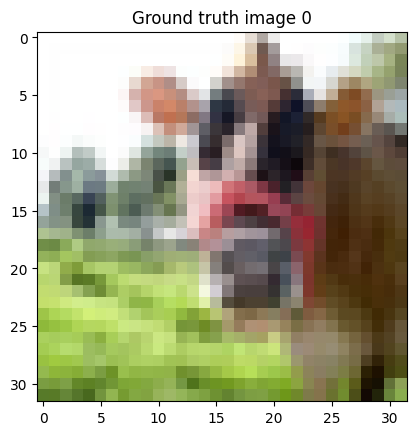

GT label is 19. 
Onehot label is 19.


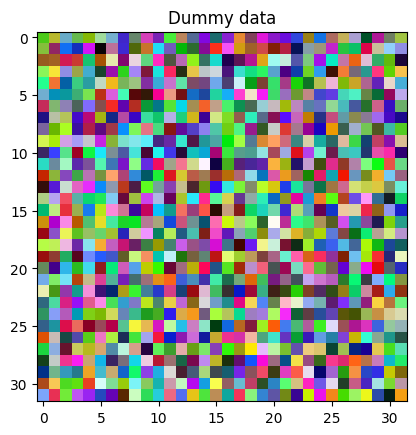

Dummy label is 27.
0 264.0863


/Users/harrysharma/6CCS3PRJ/federated-learning-security/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:282: RuntimeWarning: invalid value encountered in cast
  npimg = (npimg * 255).astype(np.uint8)


10 1809.9958
20 1809.9958
30 1809.9958
40 1809.9958
50 1809.9958
60 1809.9958
70 1809.9958
80 1809.9958
90 1809.9958
100 1809.9958
110 1809.9958
120 1809.9958
130 1809.9958
140 1809.9958
150 1809.9958
160 1809.9958
170 1809.9958
180 1809.9958
190 1809.9958
200 1809.9958
210 1809.9958
220 1809.9958
230 1809.9958
240 1809.9958
250 1809.9958
260 1809.9958
270 1809.9958
280 1809.9958
290 1809.9958


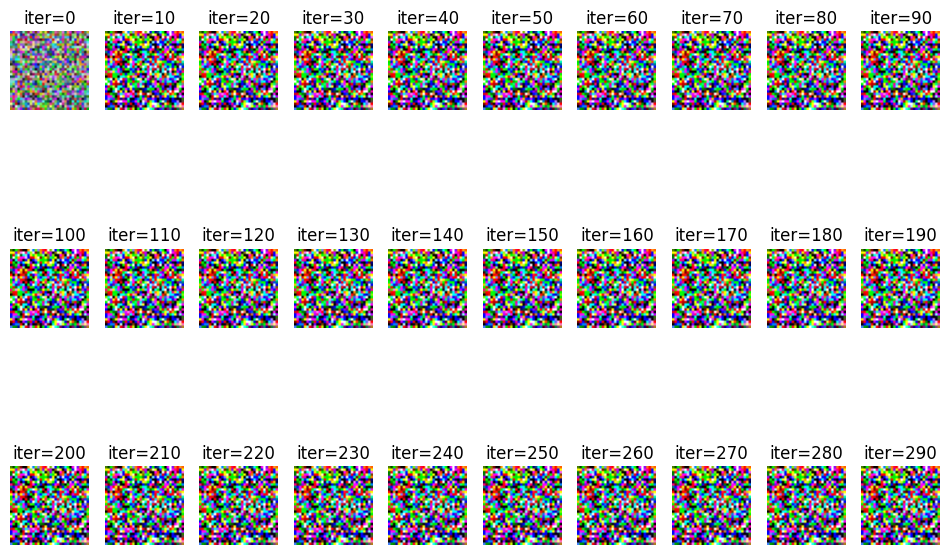

Dummy label is 0.


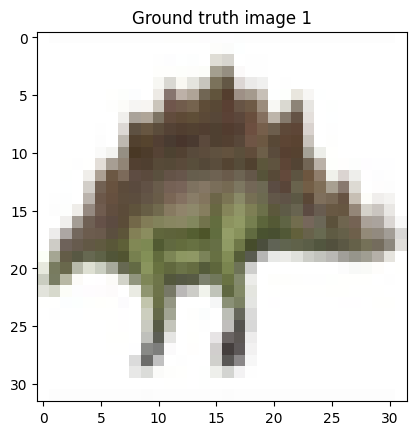

GT label is 29. 
Onehot label is 29.


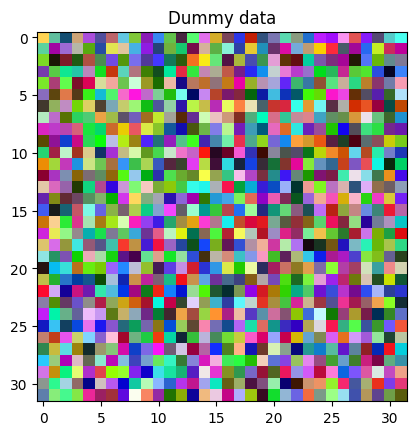

Dummy label is 4.
0 111.0276
10 4.2046
20 0.8351
30 0.1874
40 0.0674
50 0.0229
60 0.0089
70 0.0040
80 0.0018
90 0.0009
100 0.0004
110 0.0002
120 0.0001
130 0.0001
140 0.0000
150 0.0000
160 0.0000
170 0.0000
180 0.0000
190 0.0000
200 0.0000
210 0.0000
220 0.0000
230 0.0000
240 0.0000
250 0.0000
260 0.0000
270 0.0000
280 0.0000
290 0.0000


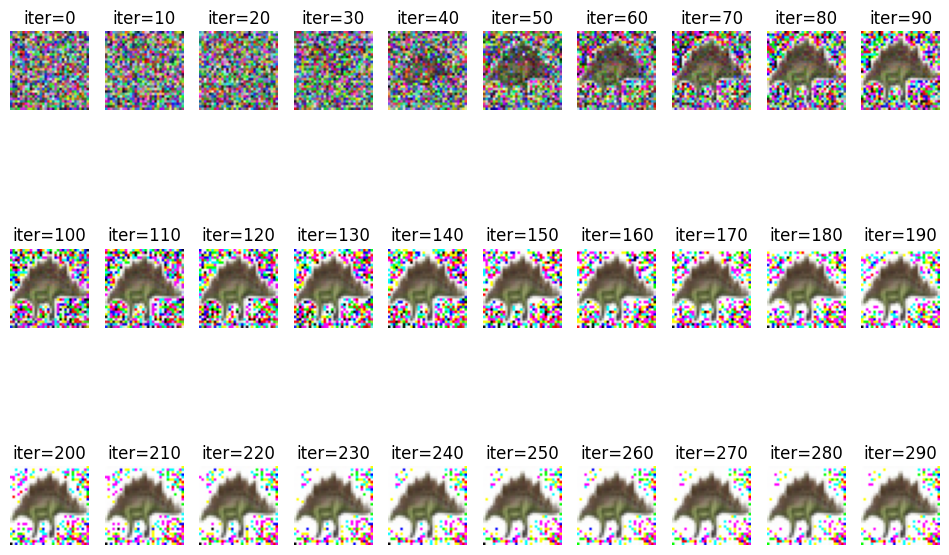

Dummy label is 29.


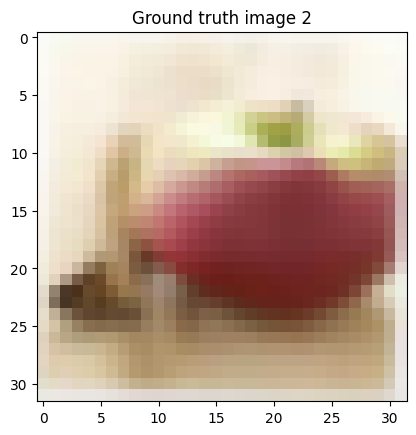

GT label is 0. 
Onehot label is 0.


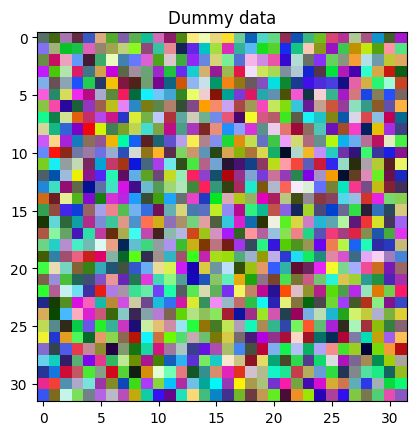

Dummy label is 9.
0 300.7888
10 31.7951
20 9.8488
30 4.5702
40 2.8750
50 2.0794
60 1.6260
70 1.3123
80 1.0736
90 0.8843
100 0.7313
110 0.6218
120 0.5260
130 0.4060
140 0.3381
150 0.2723
160 0.2049
170 0.1483
180 0.1047
190 0.0665
200 0.0364
210 0.0198
220 0.0094
230 0.0044
240 0.0021
250 0.0010
260 0.0005
270 0.0003
280 0.0002
290 0.0001


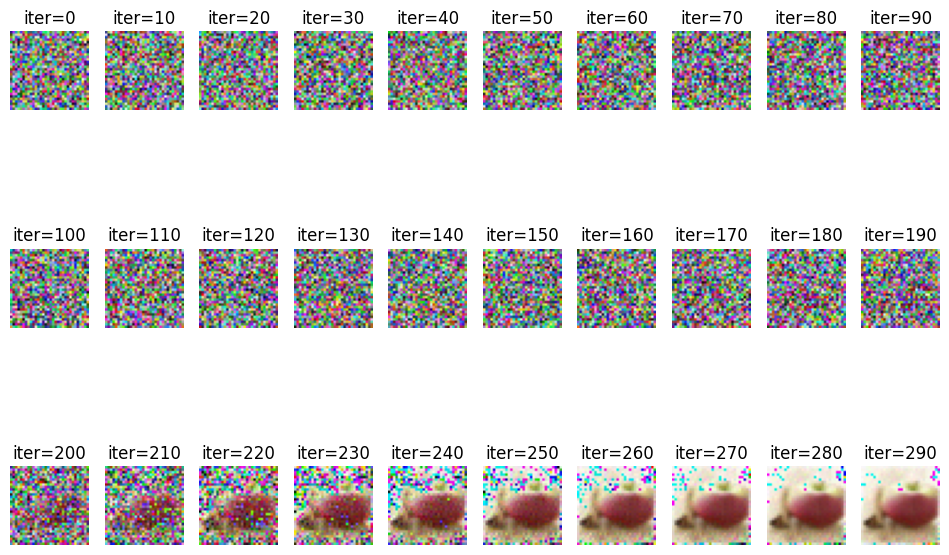

Dummy label is 0.


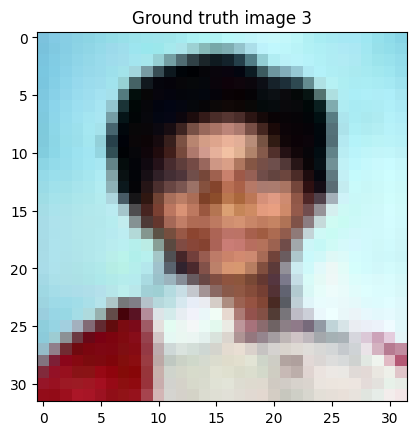

GT label is 11. 
Onehot label is 11.


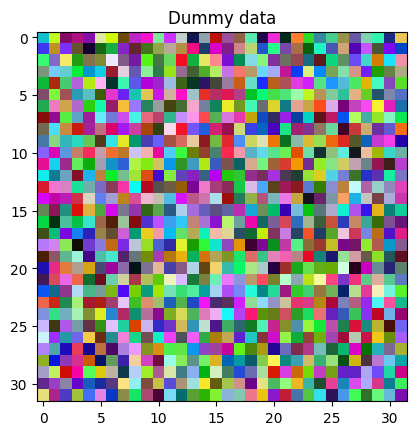

Dummy label is 95.
0 90.1159
10 2.9687
20 0.4991
30 0.0976
40 0.0257
50 0.0085
60 0.0032
70 0.0012
80 0.0005
90 0.0002
100 0.0001
110 0.0001
120 0.0000
130 0.0000
140 0.0000
150 0.0000
160 0.0000
170 0.0000
180 0.0000
190 0.0000
200 0.0000
210 0.0000
220 0.0000
230 0.0000
240 0.0000
250 0.0000
260 0.0000
270 0.0000
280 0.0000
290 0.0000


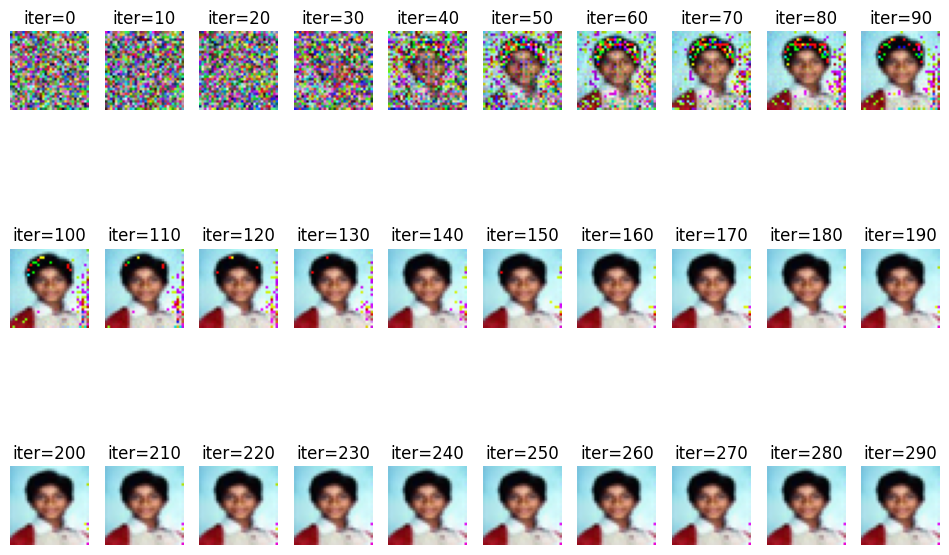

Dummy label is 11.


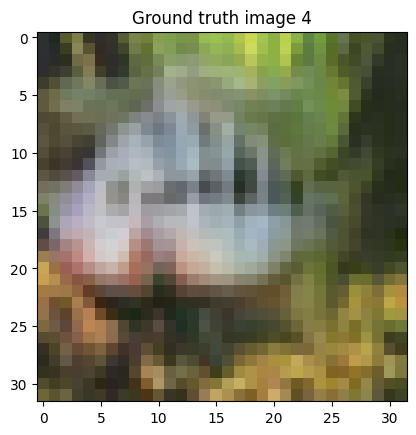

GT label is 1. 
Onehot label is 1.


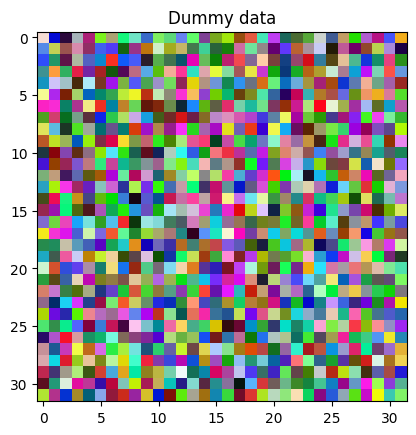

Dummy label is 85.
0 81.8063
10 2.2042
20 0.2989
30 0.0465
40 0.0089
50 0.0024
60 0.0008
70 0.0003
80 0.0001
90 0.0000
100 0.0000
110 0.0000
120 0.0000
130 0.0000
140 0.0000
150 0.0000
160 0.0000
170 0.0000
180 0.0000
190 0.0000
200 0.0000
210 0.0000
220 0.0000
230 0.0000
240 0.0000
250 0.0000
260 0.0000
270 0.0000
280 0.0000
290 0.0000


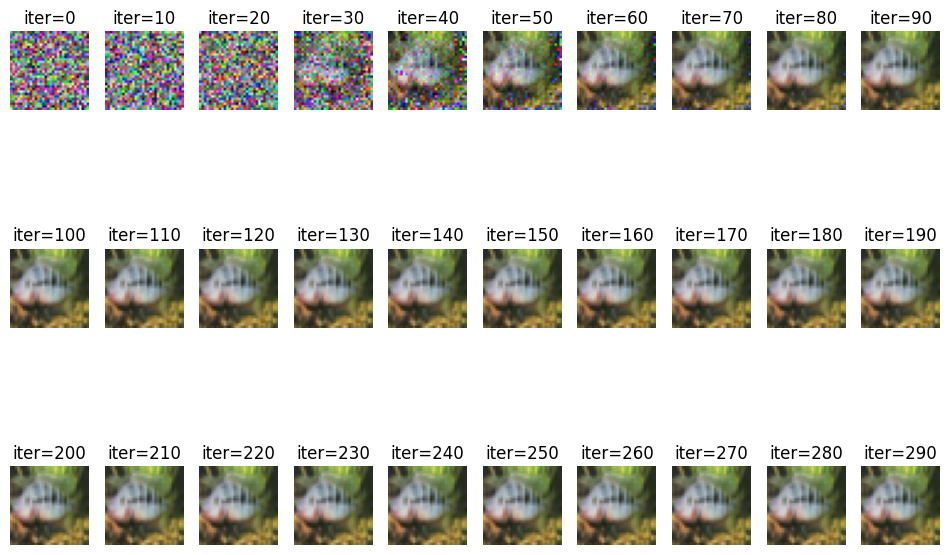

Dummy label is 1.


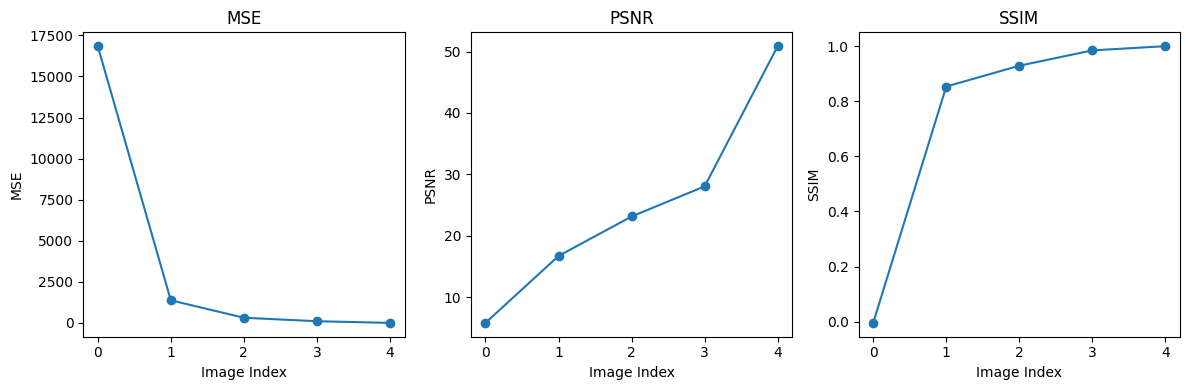

In [5]:
# Test multiple CIFAR-100 datasets
num_images = 5  # Number of images to test
results = []

for img_index in range(num_images):
    # Honest participant
    gt_data = tp(dst[img_index][0]).to(device)
    gt_data = gt_data.view(1, *gt_data.size())
    gt_label = torch.Tensor([dst[img_index][1]]).long().to(device)
    gt_label = gt_label.view(1, )
    gt_onehot_label = label_to_onehot(gt_label, num_classes=100)

    plt.imshow(tt(gt_data[0].cpu()))
    plt.title(f"Ground truth image {img_index}")
    plt.show()
    print("GT label is %d." % gt_label.item(), "\nOnehot label is %d." % torch.argmax(gt_onehot_label, dim=-1).item())

    # Compute original gradient 
    out = net(gt_data)
    y = criterion(out, gt_onehot_label)
    dy_dx = torch.autograd.grad(y, net.parameters())

    # Share the gradients with other clients
    original_dy_dx = list((_.detach().clone() for _ in dy_dx))

    # Generate dummy data and label
    dummy_data = torch.randn(gt_data.size()).to(device).requires_grad_(True)
    dummy_label = torch.randn(gt_onehot_label.size()).to(device).requires_grad_(True)

    plt.imshow(tt(dummy_data[0].cpu()))
    plt.title("Dummy data")
    plt.show()
    print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())

    optimizer = torch.optim.LBFGS([dummy_data, dummy_label])

    history = []
    for iters in range(300):
        def closure():
            optimizer.zero_grad()

            pred = net(dummy_data) 
            dummy_onehot_label = F.softmax(dummy_label, dim=-1)
            dummy_loss = criterion(pred, dummy_onehot_label)
            dummy_dy_dx = torch.autograd.grad(dummy_loss, net.parameters(), create_graph=True)
            
            grad_diff = 0
            grad_count = 0
            for gx, gy in zip(dummy_dy_dx, original_dy_dx):
                grad_diff += ((gx - gy) ** 2).sum()
                grad_count += gx.nelement()
            grad_diff.backward()
            
            return grad_diff
        
        optimizer.step(closure)
        if iters % 10 == 0: 
            current_loss = closure()
            print(iters, "%.4f" % current_loss.item())
        history.append(tt(dummy_data[0].cpu()))

    plt.figure(figsize=(12, 8))
    for i in range(30):
        plt.subplot(3, 10, i + 1)
        plt.imshow(history[i * 10])
        plt.title("iter=%d" % (i * 10))
        plt.axis('off')
    plt.show()
    print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())

    reconstructed_data = history[-1]
    mse, psnr, ssim = check_similarity(tt(gt_data[0].cpu()), reconstructed_data)
    results.append((mse, psnr, ssim))

# Plot similarity metrics
mse_values, psnr_values, ssim_values = zip(*results)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(mse_values, marker='o')
plt.title('MSE')
plt.xlabel('Image Index')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(psnr_values, marker='o')
plt.title('PSNR')
plt.xlabel('Image Index')
plt.ylabel('PSNR')

plt.subplot(1, 3, 3)
plt.plot(ssim_values, marker='o')
plt.title('SSIM')
plt.xlabel('Image Index')
plt.ylabel('SSIM')

plt.tight_layout()
plt.show()